In [ ]:
%cd "/content/drive/MyDrive/Sentiment Analysis of Code-Mixed Telugu-English Text using Sequence models. (SACMTET)"

/content/drive/MyDrive/Sentiment Analysis of Code-Mixed Telugu-English Text using Sequence models. (SACMTET)


# imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(tf.__version__)
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.random.set_seed(0)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, SimpleRNN
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import GRU, LSTM, Bidirectional
from tensorflow.keras.layers import Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
from sklearn import metrics

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2.8.0


# Utils

In [ ]:
vocab_size = 5000
embedding_dim = 300
max_len = 25

batch_size=128
epochs=20

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>", lower=True)
binarizer = LabelBinarizer()

In [ ]:
def simple_rnn():
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
    model.add(SimpleRNN(512, return_sequences=True))
    model.add(SimpleRNN(256))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics='accuracy')
    return model

def gru():
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
    model.add(GRU(512, return_sequences=True))
    model.add(GRU(256))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics='accuracy')
    return model

def lstm():
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
    model.add(LSTM(512, return_sequences=True))
    model.add(LSTM(256))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics='accuracy')
    return model

def bi_lstm():
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
    model.add(Bidirectional(LSTM(512, return_sequences=True)))
    model.add(Bidirectional(LSTM(256)))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics='accuracy')
    return model
    
def conv1d():
    model=Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
    model.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics='accuracy')
    return model


In [ ]:
# Plot history:
def plot_history(history):
    plt.figure()
    plt.plot(history.history['loss'], label='training data')
    plt.plot(history.history['val_loss'], label='validation data')
    plt.title('LOSS')
    plt.ylabel('Loss')
    plt.xlabel('No. epoch')
    plt.legend(loc="upper left")

    # Plot history: Acc
    plt.figure()
    plt.plot(history.history['accuracy'], label='training data')
    plt.plot(history.history['val_accuracy'], label='validation data')
    plt.title('ACCURACY')
    plt.ylabel('Accuracy')
    plt.xlabel('No. epoch')
    plt.legend(loc="upper left")
    plt.show()


def evaluate_model(trained_model, y_test_true):
    y_test_preds = trained_model.predict(x_test)
    y_test_preds = np.argmax(y_test_preds, axis=1)

    print(metrics.classification_report(y_test_true, y_test_preds))

    cm = metrics.confusion_matrix(y_test_true, y_test_preds, normalize='true')
    sns.heatmap(cm, annot=True, cbar=None, cmap='viridis')
    plt.show()

# Data Preprocessing

In [ ]:
data = pd.read_csv('comments20k.csv')
data.label = data.label.map({'NEG':0, 'POS':1,'NTL':2})

#stop_words = stop_words = set(stopwords.words('english'))
#data.comment = data.comment.apply(lambda x: ' '.join([word for word in x.lower().split() if word not in stop_words]))

labels = data.label.tolist()
sentences = data.comment.tolist()

_ = tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
padded_sequences = pad_sequences(sequences, padding='post', maxlen=max_len)

x_train, x_test, y_train, y_test = train_test_split(
    padded_sequences, labels, stratify=labels, test_size=0.2, random_state=101)

y_test_true = y_test.copy()

y_train = binarizer.fit_transform(y_train)
y_test = binarizer.transform(y_test)

In [ ]:
data.head()

,comment,label
0,need mr chari 's review master,2
1,worst government . #ysrcp chala chethha ga par...,0
2,bayya nuvvu emina cheppu kani bagoledu ani che...,0
3,dube gadini vadilesi manchhi pani chesaru @rcb...,1
4,came watch thyview 's review crying watching d...,1


# Simple RNN

Epoch 1/20
125/125 [==============================] - 30s 204ms/step - loss: 0.8996 - accuracy: 0.5688 - val_loss: 0.7493 - val_accuracy: 0.6777
Epoch 2/20
125/125 [==============================] - 16s 129ms/step - loss: 0.5990 - accuracy: 0.7519 - val_loss: 0.6341 - val_accuracy: 0.7340
Epoch 3/20
125/125 [==============================] - 13s 103ms/step - loss: 0.4541 - accuracy: 0.8191 - val_loss: 0.6369 - val_accuracy: 0.7330
Epoch 4/20
125/125 [==============================] - 13s 101ms/step - loss: 0.3774 - accuracy: 0.8518 - val_loss: 0.6670 - val_accuracy: 0.7297
Epoch 5/20
125/125 [==============================] - 12s 99ms/step - loss: 0.2993 - accuracy: 0.8874 - val_loss: 0.7535 - val_accuracy: 0.7179


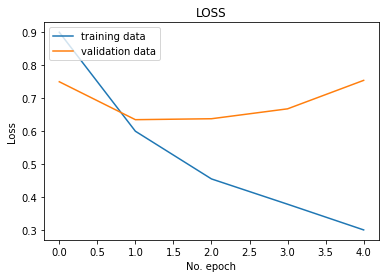

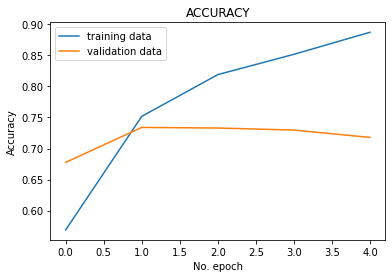

              precision    recall  f1-score   support

           0       0.74      0.83      0.78      1544
           1       0.76      0.72      0.74      1586
           2       0.58      0.51      0.55       844

    accuracy                           0.72      3974
   macro avg       0.69      0.69      0.69      3974
weighted avg       0.71      0.72      0.71      3974



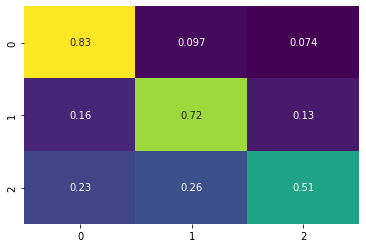

In [ ]:
rnn_model = simple_rnn()
checkpoint_path="simple_rnn_model.h5"
keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=3, mode='min', min_delta=0.0001),
      ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
]
history = rnn_model.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=keras_callbacks)

plot_history(history)
evaluate_model(rnn_model, y_test_true)

# GRU

Epoch 1/20
125/125 [==============================] - 12s 57ms/step - loss: 0.9914 - accuracy: 0.4861 - val_loss: 0.9122 - val_accuracy: 0.5463
Epoch 2/20
125/125 [==============================] - 6s 46ms/step - loss: 0.8015 - accuracy: 0.6324 - val_loss: 0.7581 - val_accuracy: 0.6563
Epoch 3/20
125/125 [==============================] - 6s 46ms/step - loss: 0.6694 - accuracy: 0.7120 - val_loss: 0.7159 - val_accuracy: 0.6784
Epoch 4/20
125/125 [==============================] - 6s 48ms/step - loss: 0.5973 - accuracy: 0.7390 - val_loss: 0.6794 - val_accuracy: 0.7026
Epoch 5/20
125/125 [==============================] - 6s 45ms/step - loss: 0.4981 - accuracy: 0.7855 - val_loss: 0.5822 - val_accuracy: 0.7506
Epoch 6/20
125/125 [==============================] - 6s 44ms/step - loss: 0.4152 - accuracy: 0.8247 - val_loss: 0.5853 - val_accuracy: 0.7572
Epoch 7/20
125/125 [==============================] - 6s 44ms/step - loss: 0.3658 - accuracy: 0.8489 - val_loss: 0.6220 - val_accuracy: 0.754

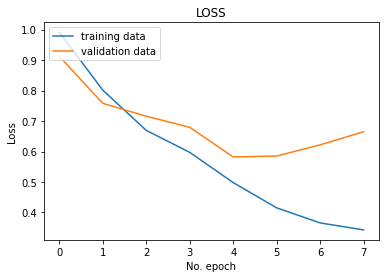

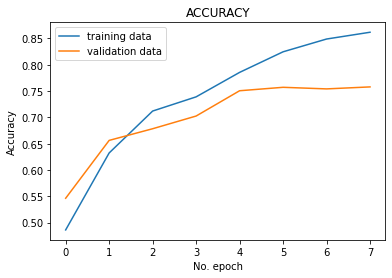

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1544
           1       0.73      0.82      0.78      1586
           2       0.63      0.61      0.62       844

    accuracy                           0.76      3974
   macro avg       0.74      0.73      0.74      3974
weighted avg       0.76      0.76      0.76      3974



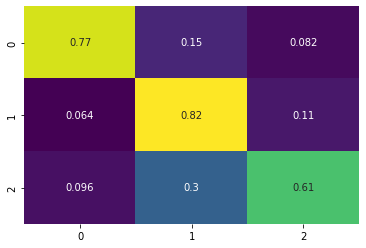

In [ ]:
gru_model = gru()
checkpoint_path="gru_model.h5"
keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=3, mode='min', min_delta=0.0001),
      ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
]
history = gru_model.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=keras_callbacks)

plot_history(history)
evaluate_model(gru_model, y_test_true)

# LSTM

Epoch 1/20
125/125 [==============================] - 12s 65ms/step - loss: 0.9464 - accuracy: 0.5214 - val_loss: 0.8288 - val_accuracy: 0.6195
Epoch 2/20
125/125 [==============================] - 7s 53ms/step - loss: 0.6953 - accuracy: 0.6961 - val_loss: 0.6248 - val_accuracy: 0.7305
Epoch 3/20
125/125 [==============================] - 7s 54ms/step - loss: 0.5119 - accuracy: 0.7854 - val_loss: 0.5745 - val_accuracy: 0.7491
Epoch 4/20
125/125 [==============================] - 6s 52ms/step - loss: 0.4306 - accuracy: 0.8244 - val_loss: 0.5862 - val_accuracy: 0.7564
Epoch 5/20
125/125 [==============================] - 7s 52ms/step - loss: 0.3829 - accuracy: 0.8446 - val_loss: 0.6072 - val_accuracy: 0.7564
Epoch 6/20
125/125 [==============================] - 7s 53ms/step - loss: 0.3523 - accuracy: 0.8607 - val_loss: 0.6534 - val_accuracy: 0.7542


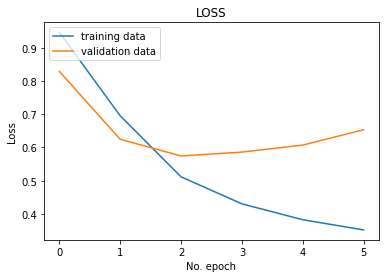

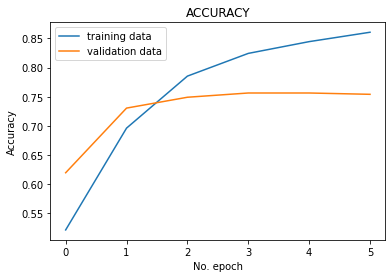

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1544
           1       0.75      0.79      0.77      1586
           2       0.60      0.66      0.63       844

    accuracy                           0.75      3974
   macro avg       0.74      0.74      0.74      3974
weighted avg       0.76      0.75      0.76      3974



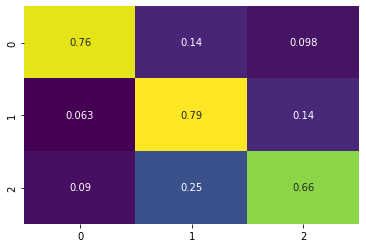

In [ ]:
lstm_model = lstm()
checkpoint_path="lstm_model.h5"
keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=3, mode='min', min_delta=0.0001),
      ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
]
history = lstm_model.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=keras_callbacks)

plot_history(history)
evaluate_model(lstm_model, y_test_true)

# Bi LSTM

Epoch 1/20
125/125 [==============================] - 28s 162ms/step - loss: 0.9338 - accuracy: 0.5316 - val_loss: 0.7955 - val_accuracy: 0.6392
Epoch 2/20
125/125 [==============================] - 16s 129ms/step - loss: 0.6301 - accuracy: 0.7266 - val_loss: 0.5884 - val_accuracy: 0.7456
Epoch 3/20
125/125 [==============================] - 16s 126ms/step - loss: 0.4733 - accuracy: 0.8040 - val_loss: 0.5388 - val_accuracy: 0.7680
Epoch 4/20
125/125 [==============================] - 14s 111ms/step - loss: 0.3997 - accuracy: 0.8374 - val_loss: 0.5692 - val_accuracy: 0.7549
Epoch 5/20
125/125 [==============================] - 14s 110ms/step - loss: 0.3585 - accuracy: 0.8565 - val_loss: 0.5897 - val_accuracy: 0.7662
Epoch 6/20
125/125 [==============================] - 14s 110ms/step - loss: 0.3233 - accuracy: 0.8704 - val_loss: 0.6329 - val_accuracy: 0.7604


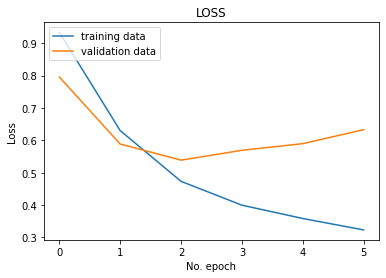

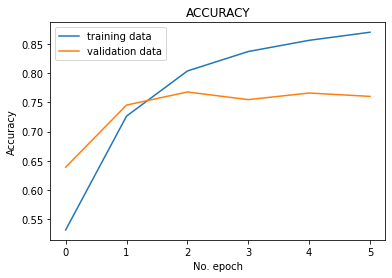

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1544
           1       0.76      0.80      0.78      1586
           2       0.59      0.68      0.63       844

    accuracy                           0.76      3974
   macro avg       0.75      0.75      0.74      3974
weighted avg       0.77      0.76      0.76      3974



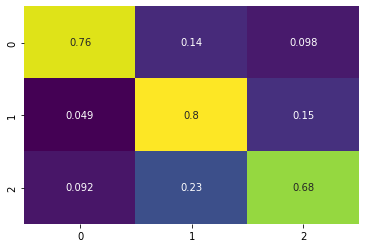

In [ ]:
bi_lstm_model = bi_lstm()
checkpoint_path="bi_lstm_model.h5"
keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=3, mode='min', min_delta=0.0001),
      ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
]
history = bi_lstm_model.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=keras_callbacks)

plot_history(history)
evaluate_model(bi_lstm_model, y_test_true)

# conv1D

Epoch 1/20
125/125 [==============================] - 4s 20ms/step - loss: 0.9998 - accuracy: 0.4736 - val_loss: 0.9413 - val_accuracy: 0.5211
Epoch 2/20
125/125 [==============================] - 2s 14ms/step - loss: 0.8685 - accuracy: 0.5839 - val_loss: 0.7588 - val_accuracy: 0.6565
Epoch 3/20
125/125 [==============================] - 2s 14ms/step - loss: 0.6008 - accuracy: 0.7419 - val_loss: 0.5944 - val_accuracy: 0.7375
Epoch 4/20
125/125 [==============================] - 2s 14ms/step - loss: 0.4512 - accuracy: 0.8141 - val_loss: 0.5438 - val_accuracy: 0.7680
Epoch 5/20
125/125 [==============================] - 2s 13ms/step - loss: 0.3816 - accuracy: 0.8493 - val_loss: 0.5515 - val_accuracy: 0.7728
Epoch 6/20
125/125 [==============================] - 2s 13ms/step - loss: 0.3334 - accuracy: 0.8720 - val_loss: 0.5770 - val_accuracy: 0.7672
Epoch 7/20
125/125 [==============================] - 2s 13ms/step - loss: 0.2933 - accuracy: 0.8885 - val_loss: 0.6156 - val_accuracy: 0.7647

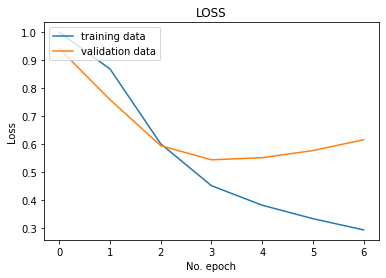

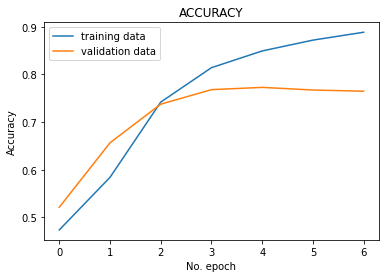

              precision    recall  f1-score   support

           0       0.85      0.78      0.82      1544
           1       0.79      0.78      0.79      1586
           2       0.60      0.70      0.64       844

    accuracy                           0.76      3974
   macro avg       0.75      0.75      0.75      3974
weighted avg       0.77      0.76      0.77      3974



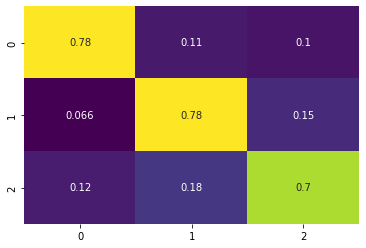

In [ ]:
conv_model = conv1d()
checkpoint_path="conv_model.h5"
keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=3, mode='min', min_delta=0.0001),
      ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
]
history = conv_model.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=keras_callbacks)

plot_history(history)
evaluate_model(conv_model, y_test_true)